# Pymaceuticals Inc.
---

### Analysis

-Within the given data, I was able to create several graphs that outline the tumor volumes and treatment groups. For example, the box plot graph shows the distribution of the tumor volumes for each treatment group. These groups are Capomulin, Ramicane, Infubinol and Ceftamin.

I can see that Capomulin and Ramicane share similar data traits. They both have a tumor volume of roughly 40. Infubinol and Ceftamin range on the higher end of the spectrum, sitting between roughly 50 and 60.  

I was able to create a line plot chart that shows the Tumor Volume vs. the Time Point for Mouse ID: b128. From this chart, I can see that the tumor volume for the subject was at 45 at the starting time of 0. Over the course of time, the tumor volume diminishes substantially. There is a steady decline, with the tumor volume reaching an all-time low of 38 at a time point of about 35. By the time point of 40, there is a slight increase in tumor volume.

The scatter plot chart shows that the average tumor volume increase with a weight increase. Throughout the scatter plot chart, this is a consistent trend.

The final line plot chart, there is rise in tumor volume given a weight increase of the mouse. This is in conjunction with the use of the Capomulin regimen. The correlation coefficient is 0.84.

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df=pd.merge(study_results,mouse_metadata,how="left",on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
combined_df["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = combined_df[combined_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicate_df["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=combined_df.loc[combined_df["Mouse ID"]!="g989"]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor_volume=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_tumor_volume=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_tumor_volume=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor_volume=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_df=pd.DataFrame({
"Mean Tumor Volume":mean_tumor_volume,
"Median Tumor Volume":median_tumor_volume,
"Tumor Volume Variance":var_tumor_volume,
"Tumor Volume Std. Dev.":std_tumor_volume,
"Tumor Volume Std. Err.":sem_tumor_volume
    
})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df2 = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean','median','var','std','sem']})
summary_df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

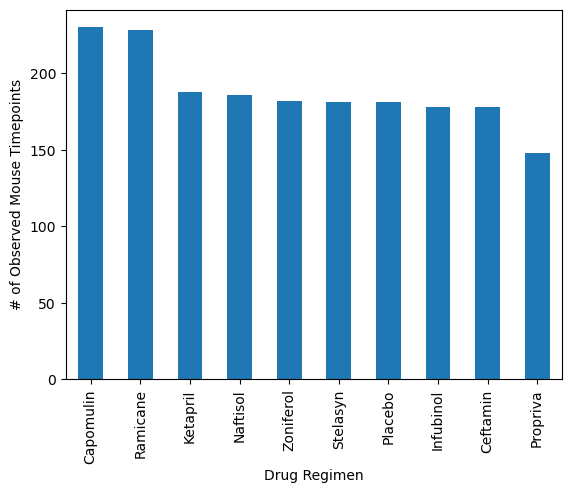

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_count=clean_df["Drug Regimen"].value_counts()
drug_count.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

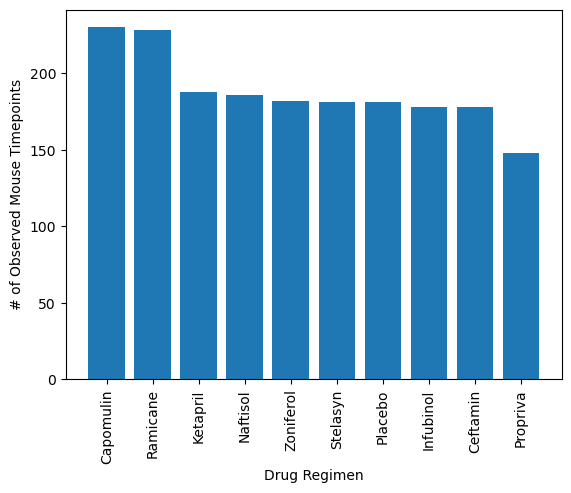

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x=drug_count.index
y=drug_count.values
plt.bar(x,y)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

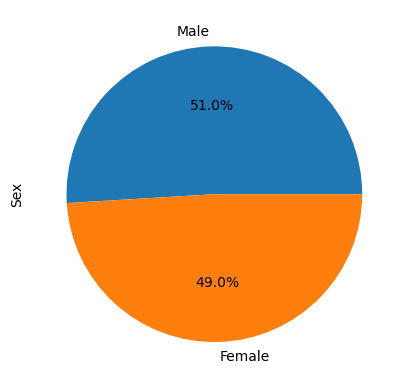

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count=clean_df["Sex"].value_counts()
gender_count.plot(kind="pie",autopct='%.1f%%')
plt.ylabel("Sex")
plt.show()

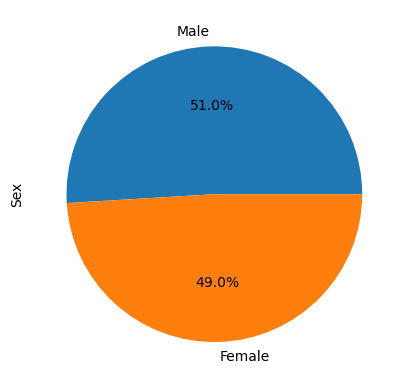

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values = gender_count.values
labels = gender_count.index
plt.pie(values, labels=labels, autopct='%.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_df=clean_df.groupby("Mouse ID")[["Timepoint"]].max().reset_index()
max_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df=pd.merge(max_df,clean_df,how="left",on=["Mouse ID","Timepoint"])
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_datalist=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_series=merge_df.loc[merge_df["Drug Regimen"] == drug,"Tumor Volume (mm3)"]

    
    # add subset 
    tumor_datalist.append(tumor_series)
    
    # Determine outliers using upper and lower bounds
    
    quartiles=tumor_series.quantile([.25,.5,.75])
    q1 = tumor_series.quantile(0.25)
    q3 = tumor_series.quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    outliers = tumor_series.loc[(tumor_series < fence_low) | (tumor_series > fence_high)]
    print(f"{drug} outliers :{outliers}")

Capomulin outliers :Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers :Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outliers :31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outliers :Series([], Name: Tumor Volume (mm3), dtype: float64)


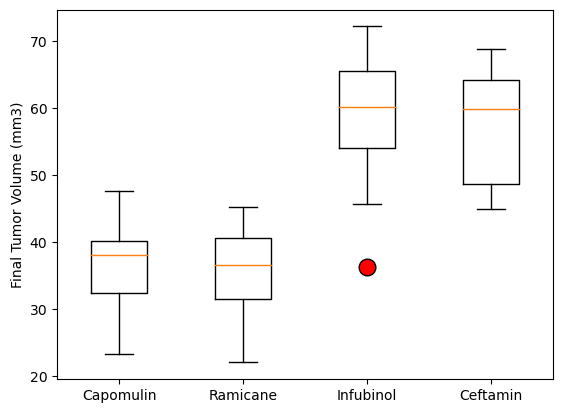

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_datalist, labels = drug_list,flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

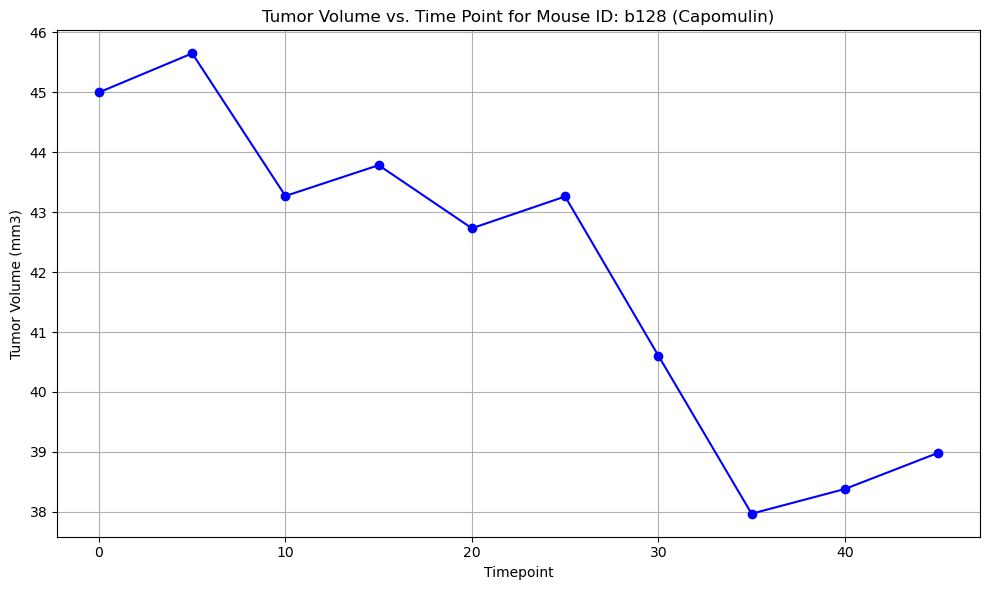

In [16]:
# Filter the data for Capomulin regimen
capomulin_data= clean_df[clean_df["Drug Regimen"] == "Capomulin"]

# Choose a single mouse treated with Capomulin (you can replace 'mouse_id' with the desired Mouse ID)
mouse_id = capomulin_data["Mouse ID"].iloc[0]
single_mouse_data = capomulin_data[capomulin_data["Mouse ID"] ==mouse_id]

# Create a line plot for tumor volume vs. time point for the chosen mouse
plt.figure(figsize=(10, 6))
plt.plot(single_mouse_data["Timepoint"], single_mouse_data["Tumor Volume (mm3)"], marker='o', color='blue')

# Add labels and title
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume vs. Time Point for Mouse ID: {mouse_id} (Capomulin)")

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/r4/w1px4dys0fn2__yxbd78qyz40000gn/T/ipykernel_82597/3721315709.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_capm_vol = capomulin_data.groupby(['Mouse ID']).mean()


Text(0, 0.5, 'Averag Tumor Volume (mm3)')

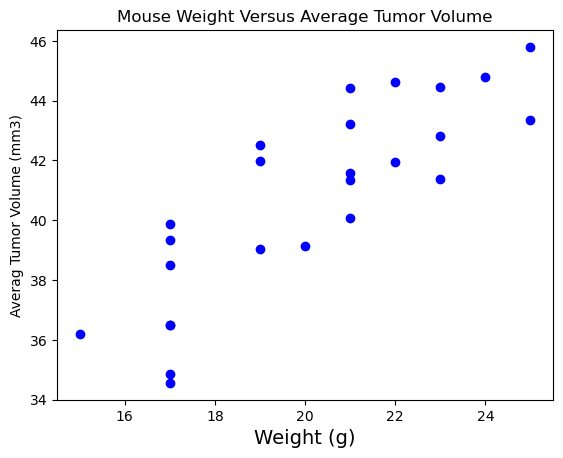

In [32]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capm_vol = capomulin_data.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

Correlation Coefficient between Mouse Weight and Average Tumor Volume: 0.84


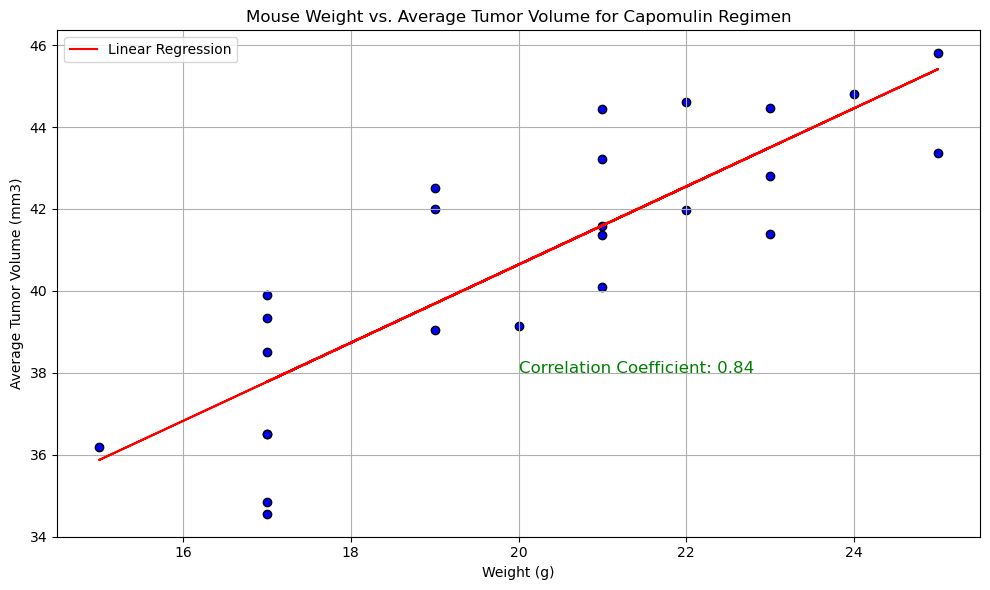

In [37]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient = round(st.pearsonr(avg_capm_vol['Weight (g)'], avg_capm_vol['Tumor Volume (mm3)'])[0], 2)
print(f'Correlation Coefficient between Mouse Weight and Average Tumor Volume: {correlation_coefficient}')

model = st.linregress(avg_capm_vol['Weight (g)'], avg_capm_vol['Tumor Volume (mm3)'])
y_values = avg_capm_vol['Weight (g)'] * model[0] + model[1]

plt.figure(figsize=(10, 6))
plt.scatter(avg_capm_vol['Weight (g)'], avg_capm_vol['Tumor Volume (mm3)'],
            marker='o', color='blue', edgecolors='black')
plt.plot(avg_capm_vol['Weight (g)'], y_values,
         color='red', label='Linear Regression')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.text(20, 38, f"Correlation Coefficient: {correlation_coefficient:.2f}", fontsize=12, color='green')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
